# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
country_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloud_coverage = []
wind_speed = []
city_datetime = []

x = -1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for city in cities[:575]:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #print(query_url)
    
    time.sleep(1)  #sleep 1 second between calls
    
    try:
        
        #get data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        country_name.append(weather_json['sys']['country'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud_coverage.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        city_datetime.append(weather_json['dt'])
        x = x + 1
        print(f'City Number: {city_number[x]} City Name: {city_name[x]}')

    except:
        
        print("city not found")





City Number: 3386568 City Name: Tauá
City Number: 3833367 City Name: Ushuaia
City Number: 1282256 City Name: Hithadhoo
City Number: 2126199 City Name: Cherskiy
City Number: 582447 City Name: Almaznyy
City Number: 3652764 City Name: Puerto Ayora
City Number: 3366880 City Name: Hermanus
City Number: 3874787 City Name: Punta Arenas
City Number: 6170031 City Name: Tuktoyaktuk
city not found
City Number: 4030556 City Name: Rikitea
city not found
City Number: 777019 City Name: Vardø
City Number: 5793822 City Name: Enumclaw
city not found
city not found
City Number: 964420 City Name: Port Elizabeth
City Number: 2206939 City Name: Bluff
City Number: 3414079 City Name: Olafsvik
City Number: 909488 City Name: Lukulu
City Number: 3388456 City Name: São José da Coroa Grande
City Number: 3939761 City Name: Hualmay
City Number: 1799629 City Name: Nanyang
City Number: 1591474 City Name: Bac Lieu
City Number: 1015776 City Name: Bredasdorp
city not found
City Number: 5962442 City Name: Goderich
City Nu

City Number: 2137773 City Name: Vao
city not found
City Number: 3870282 City Name: Talcahuano
City Number: 1812256 City Name: Dongsheng
City Number: 2035453 City Name: Pingzhuang
City Number: 2208248 City Name: Kaitangata
City Number: 2013639 City Name: Verkhnevilyuysk
City Number: 3443061 City Name: Chui
City Number: 3576994 City Name: Cockburn Town
City Number: 5830062 City Name: Laramie
City Number: 2436400 City Name: Ati
City Number: 1513491 City Name: Yangi Marg`ilon
City Number: 3489440 City Name: Morant Bay
City Number: 1257629 City Name: Salem
City Number: 3521108 City Name: Progreso
City Number: 2112802 City Name: Hasaki
City Number: 780687 City Name: Berlevåg
City Number: 108410 City Name: Riyadh
City Number: 2180815 City Name: Tuatapere
City Number: 1785974 City Name: Yuci
City Number: 610298 City Name: Beyneu
City Number: 3421193 City Name: Paamiut
City Number: 962367 City Name: Richards Bay
City Number: 6929460 City Name: Panzhihua
City Number: 5820705 City Name: Casper
Ci

City Number: 2094342 City Name: Kavieng
City Number: 3452029 City Name: Quijingue
City Number: 3841956 City Name: Paraná
City Number: 1061605 City Name: Manakara
City Number: 157429 City Name: Kilindoni
City Number: 3893629 City Name: Coquimbo
City Number: 933995 City Name: Souillac
City Number: 1251081 City Name: Anuradhapura
City Number: 3401340 City Name: Cupira
City Number: 3372783 City Name: Ponta Delgada
city not found
City Number: 178522 City Name: Voi
City Number: 3832899 City Name: Viedma
City Number: 104515 City Name: Makkah al Mukarramah
City Number: 2521582 City Name: Arona
City Number: 1736458 City Name: Kudat
City Number: 363885 City Name: Wau
City Number: 3170069 City Name: Porto Torres
City Number: 4787534 City Name: Sterling
City Number: 895953 City Name: Zambezi
City Number: 1490085 City Name: Tarko-Sale
City Number: 153955 City Name: Micheweni
City Number: 152403 City Name: Mvomero
City Number: 6167817 City Name: Torbay
City Number: 4791259 City Name: Virginia Beach


In [5]:
print(city_name, city_number, country_name, latitude, longitude, temperature, humidity, cloud_coverage, wind_speed, city_datetime)

['Tauá', 'Ushuaia', 'Hithadhoo', 'Cherskiy', 'Almaznyy', 'Puerto Ayora', 'Hermanus', 'Punta Arenas', 'Tuktoyaktuk', 'Rikitea', 'Vardø', 'Enumclaw', 'Port Elizabeth', 'Bluff', 'Olafsvik', 'Lukulu', 'São José da Coroa Grande', 'Hualmay', 'Nanyang', 'Bac Lieu', 'Bredasdorp', 'Goderich', 'Lagoa', 'Ahipara', 'Albany', 'Butaritari', 'Oodweyne', 'Te Anau', 'Esperance', 'Faanui', 'Sisimiut', 'Saskylakh', 'Oranjemund', 'Dingle', 'Jamestown', 'Hobart', 'Benghazi', 'Kapaa', 'Mahébourg', 'Upernavik', 'São Filipe', 'Karpathos', 'Saint George', 'Rensvik', 'Yellowknife', 'Ponta do Sol', 'Singkang', 'Laguna', 'Mount Isa', 'Guymon', 'Bengkulu', 'Hong Kong', 'Chanika', 'Ostrovnoy', 'Matadi', 'Grand Gaube', 'Koumac', 'East London', 'Kruisfontein', 'Teknāf', 'Aklavik', 'Petropavlovsk-Kamchatskiy', 'Talnakh', 'Vaini', 'Mataura', 'Batouri', 'Port Alfred', 'La Ronge', 'Corinth', 'Busselton', 'Guerrero Negro', 'Longyearbyen', 'Lebu', 'Metu', 'Barrow', 'Opelousas', 'Maningrida', "Severo-Kuril'sk", 'Avarua', 'K

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "City Country": country_name,
                              "Latitude" : latitude,
                              "Longitude" : longitude,
                              "Max Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloud Coverage" : cloud_coverage,
                              "Wind Speed" : wind_speed,
                              "City Datetime" : city_datetime})

city_results.to_csv("city_results.cvs", encoding = "utf-8", index = False)

In [7]:
city_results.head(20)

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Tauá,3386568,BR,-5.9667,-40.3000,79.90,60,71,5.59,1613255606
1,Ushuaia,3833367,AR,-54.8000,-68.3000,44.60,81,75,0.56,1613255218
2,Hithadhoo,1282256,MV,-0.6000,73.0833,82.26,76,36,11.10,1613255269
3,Cherskiy,2126199,RU,68.7500,161.3000,-10.59,82,31,10.96,1613255270
4,Almaznyy,582447,RU,48.0448,40.0450,17.60,57,20,20.13,1613255610
5,Puerto Ayora,3652764,EC,-0.7393,-90.3518,86.00,66,75,13.80,1613255208
6,Hermanus,3366880,ZA,-34.4187,19.2345,68.00,89,0,6.29,1613255225
7,Punta Arenas,3874787,CL,-53.1500,-70.9167,53.60,43,0,13.80,1613255209
8,Tuktoyaktuk,6170031,CA,69.4541,-133.0374,-7.60,77,75,8.05,1613255255
9,Rikitea,4030556,PF,-23.1203,-134.9692,80.06,74,56,9.57,1613255242


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
humid_cities = []

#get a list of cities that have humidity < 100
humid_cities = city_results[city_results["Humidity"] > 100].index

print(humid_cities)


Int64Index([], dtype='int64')


In [9]:
clean_city_data = city_results.drop(humid_cities,inplace = False)

clean_city_data.head()

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Tauá,3386568,BR,-5.9667,-40.3000,79.90,60,71,5.59,1613255606
1,Ushuaia,3833367,AR,-54.8000,-68.3000,44.60,81,75,0.56,1613255218
2,Hithadhoo,1282256,MV,-0.6000,73.0833,82.26,76,36,11.10,1613255269
3,Cherskiy,2126199,RU,68.7500,161.3000,-10.59,82,31,10.96,1613255270
4,Almaznyy,582447,RU,48.0448,40.0450,17.60,57,20,20.13,1613255610


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#retrieve the Temperature that will be used each time
latitude = clean_city_data["Latitude"]


## Latitude vs. Temperature Plot

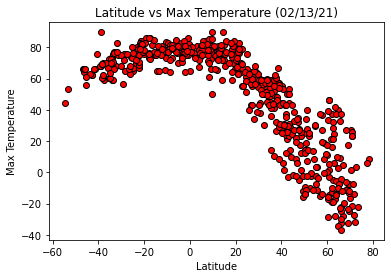

In [11]:
temperature = clean_city_data["Max Temperature"]

#using matplotlib
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(('Latitude vs Max Temperature (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_max_temp", bbox_inches='tight')

plt.show()

#the code is analyzing if there is a corellation between latitude and max temperature

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

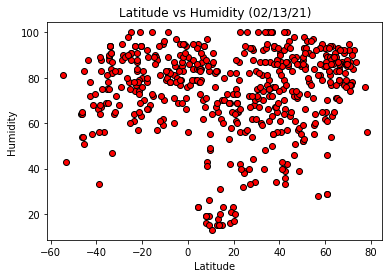

In [12]:
humidity = clean_city_data["Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(('Latitude vs Humidity (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_humidity", bbox_inches='tight')

plt.show

##the code is analyzing if there is a corellation between latitude and humidity

## Latitude vs. Cloud Coverage Plot

<function matplotlib.pyplot.show(*args, **kw)>

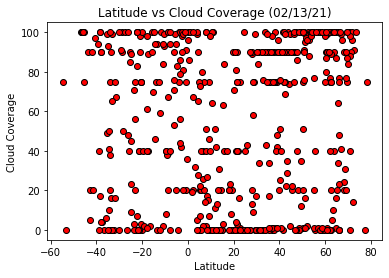

In [13]:
cloud_coverage = clean_city_data["Cloud Coverage"]

plt.scatter(latitude, cloud_coverage, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage')
plt.title(('Latitude vs Cloud Coverage (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_cloud_coverage", bbox_inches='tight')

plt.show

##the code is analyzing if there is a corellation between latitude and cloud coverage

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

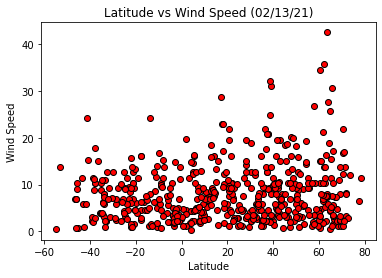

In [14]:
wind_speed = clean_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(('Latitude vs Wind Speed (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_wind_speed", bbox_inches='tight')

plt.show

#the code is analyzing if there is a corellation between latitude and wind speed

## Linear Regression

In [15]:
#the starter code had from scipy.stats import linregress

w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = linregress(latitude, humidity)


print(w_slope)

0.021221892350797498


In [16]:
#function
# Add the linear regression equation and line to plot
def find_lin_reg(x_values, y_values, title, y_label, cordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title((title + '  (%s)' % time.strftime("%x")))
    plt.savefig(title)
    plt.show()

In [17]:
northern_data = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_data = clean_city_data.loc[clean_city_data["Latitude"]< 0]
southern_data.head()

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Tauá,3386568,BR,-5.9667,-40.3000,79.90,60,71,5.59,1613255606
1,Ushuaia,3833367,AR,-54.8000,-68.3000,44.60,81,75,0.56,1613255218
2,Hithadhoo,1282256,MV,-0.6000,73.0833,82.26,76,36,11.10,1613255269
5,Puerto Ayora,3652764,EC,-0.7393,-90.3518,86.00,66,75,13.80,1613255208
6,Hermanus,3366880,ZA,-34.4187,19.2345,68.00,89,0,6.29,1613255225


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

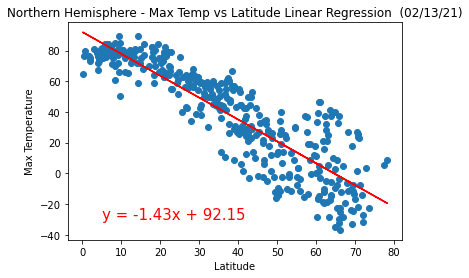

In [18]:
x_values = northern_data["Latitude"]
y_values = northern_data["Max Temperature"]
title = "Northern Hemisphere - Max Temp vs Latitude Linear Regression"
y_label = "Max Temperature"

find_lin_reg(x_values, y_values, title, y_label, (5,-30))


##the liear regression is showing that there is a direct corellation between the latitude and the max temperature
#the lower the latitued the higher the max temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

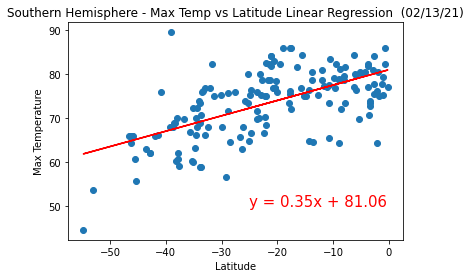

In [19]:
x_values = southern_data["Latitude"]
y_values = southern_data["Max Temperature"]
title = "Southern Hemisphere - Max Temp vs Latitude Linear Regression"
y_label = "Max Temperature"

find_lin_reg(x_values, y_values, title, y_label, (-25,50))

##the liear regression is showing that there is a direct corellation between the latitude and the max temperature
#the lower the latitued the higher the max temperature

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

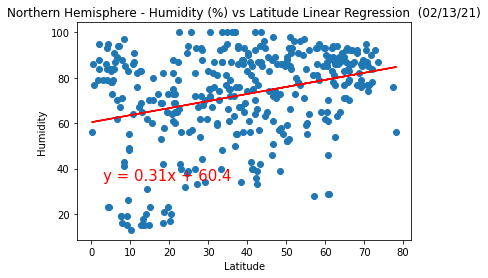

In [20]:
x_values = northern_data["Latitude"]
y_values = northern_data["Humidity"]
title = "Northern Hemisphere - Humidity (%) vs Latitude Linear Regression"
y_label = "Humidity"

find_lin_reg(x_values, y_values, title, y_label, (3,35))

#there is not a corelation between the latitude and humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

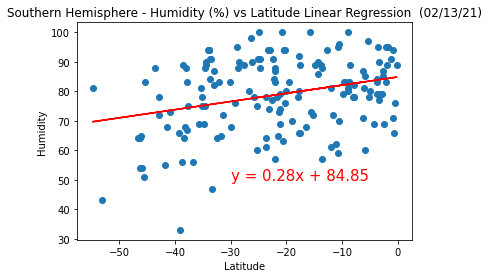

In [21]:
x_values = southern_data["Latitude"]
y_values = southern_data["Humidity"]
title = "Southern Hemisphere - Humidity (%) vs Latitude Linear Regression"
y_label = "Humidity"

find_lin_reg(x_values, y_values, title, y_label, (-30,50))

#there is not a corelation between the latitude and humidity

####  Northern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression

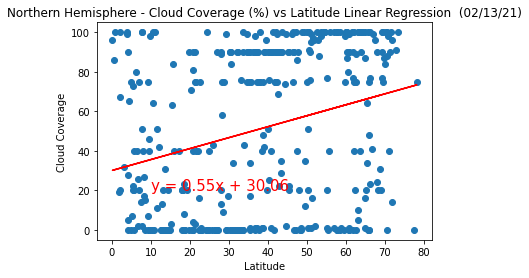

In [22]:
x_values = northern_data["Latitude"]
y_values = northern_data["Cloud Coverage"]
title = "Northern Hemisphere - Cloud Coverage (%) vs Latitude Linear Regression"
y_label = "Cloud Coverage"

find_lin_reg(x_values, y_values, title, y_label, (10,20))

#there is not a corelation between the latitude and cloud coverage

####  Southern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression

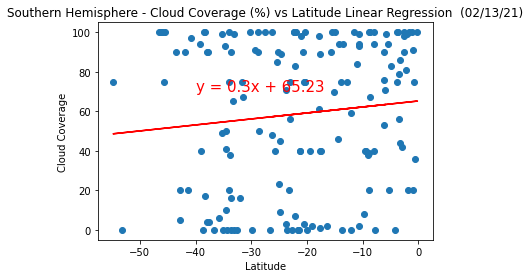

In [23]:
x_values = southern_data["Latitude"]
y_values = southern_data["Cloud Coverage"]
title = "Southern Hemisphere - Cloud Coverage (%) vs Latitude Linear Regression"
y_label = "Cloud Coverage"

find_lin_reg(x_values, y_values, title, y_label, (-40,70))

#there is not a corelation between the latitude and cloud coverage

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

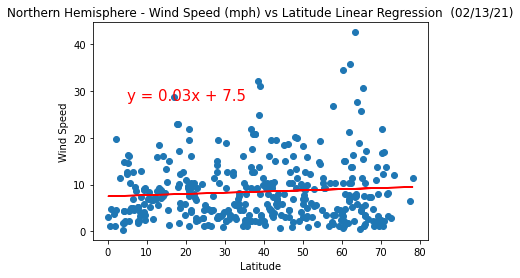

In [24]:
x_values = northern_data["Latitude"]
y_values = northern_data["Wind Speed"]
title = "Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression"
y_label = "Wind Speed"

find_lin_reg(x_values, y_values, title, y_label, (5,28))
#there is not a corelation between the latitude and wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

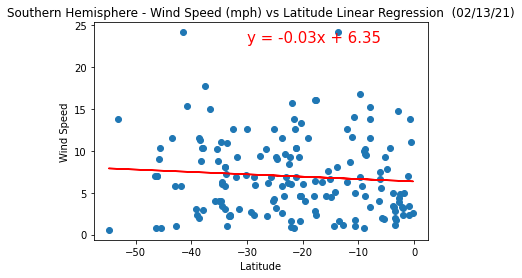

In [25]:
x_values = southern_data["Latitude"]
y_values = southern_data["Wind Speed"]
title = "Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression"
y_label = "Wind Speed"

find_lin_reg(x_values, y_values, title, y_label, (-30, 23))
#there is not a corelation between the latitude and wind speed